In [1]:
# MASLD Awareness Tracker - Results Notebook
"This project tracks and analyzes public and scientific awareness of Metabolic Dysfunction-Associated Steatotic Liver Disease (MASLD) in relation to FDA drug approvals of Resmetirom and GLP-1 agonists, examining impacts across search trends, scientific literature, social media, stock markets, and news media."

import os
import sys
import pandas as pd
import seaborn as sns
from pathlib import Path

# Set up matplotlib for notebook display
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

# Add project root to path for imports
project_root = Path().resolve().parent
sys.path.append(str(project_root))

from config import DATA_DIR, RESULTS_DIR, STUDY_START_DATE, STUDY_END_DATE, FDA_EVENT_DATES

# NOTE: All required packages (including gdown) are installed via requirements.txt

In [ ]:
# Create directories
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"Study Period: {STUDY_START_DATE} to {STUDY_END_DATE}")
print(f"FDA Events: {FDA_EVENT_DATES}")
print(f"Data Sources: Google Trends, Stock Data, Reddit, PubMed, Media Cloud")

In [2]:
# --- Core Analysis Pipeline ---
print("=== CORE ANALYSIS PIPELINE ===")
from load import get_google_trends_data, get_stock_data, get_reddit_data, get_pubmed_data, get_media_cloud_data
from process import process_google_trends, process_stock_data, process_reddit_data, process_pubmed_data
from analyze import (analyze_google_trends, analyze_stock_and_events, analyze_reddit_sentiment,
                    analyze_pubmed_publication_rate, advanced_pubmed_analysis,
                    advanced_google_trends_analysis, validate_statistical_assumptions, advanced_reddit_sentiment_analysis,
                    analyze_reddit_topics, analyze_temporal_patterns, correlate_reddit_trends,
                    analyze_subreddit_networks, calculate_statistical_power, create_reddit_summary_table, advanced_stock_analysis, advanced_stock_volatility_analysis, cross_platform_correlation_analysis, advanced_media_cloud_event_analysis, advanced_media_cloud_concentration_analysis, advanced_media_cloud_topic_propagation)

=== CORE ANALYSIS PIPELINE ===


In [3]:
# Install required package for Google Drive fallback
!pip install gdown

In [ ]:
# Check if gdown is available for Google Drive fallback
try:
    import gdown
    gdown_available = True
    print("gdown package available for Google Drive fallback")
except ImportError:
    gdown_available = False
    print("gdown package not available - install with: pip install gdown")

In [ ]:
# Google Trends Analysis (with API first, fallback to G-Drive)
print("=== GOOGLE TRENDS ANALYSIS ===")

# Method 1: API Approach
print("Attempting API data retrieval...")
try:
    trends_data = get_google_trends_data()
    if trends_data is not None:
        processed_trends = process_google_trends(trends_data)

        # === DEBUG FOR API PATH ===
        print("=== API PATH DEBUG ===")
        print(f"processed_trends type: {type(processed_trends)}")
        print(f"processed_trends shape: {processed_trends.shape}")
        print(f"Index: {processed_trends.index[:3]} ... {processed_trends.index[-3:]}")
        print(f"Columns: {processed_trends.columns.tolist()}")
        print(f"Data types:\n{processed_trends.dtypes}")
        print("\nSample values:")
        for col in processed_trends.columns:
            print(f"  {col}: min={processed_trends[col].min()}, max={processed_trends[col].max()}, mean={processed_trends[col].mean():.3f}")
        print("="*50)
        # === END DEBUG ===

        analyze_google_trends(processed_trends, notebook_plot=True)
        print("Google Trends analysis completed via API")
    else:
        raise Exception("API returned no data")

except Exception as e:
    print(f"API approach failed: {e}")

    # Method 2: Google Drive Fallback
    print("Falling back to Google Drive data...")
    try:
        from config import load_google_trends_from_drive
        drive_data = load_google_trends_from_drive()

        if drive_data is not None:
            processed_trends = process_google_trends(drive_data)

            # Add Data Preview:
            print(f"Google Trends data shape: {processed_trends.shape}")
            print("First 3 rows of Google Trends data:")
            print(processed_trends.head(3))
            print("="*50)

            # === DEBUG FOR DRIVE PATH ===
            print("=== DRIVE PATH DEBUG ===")
            print(f"processed_trends type: {type(processed_trends)}")
            print(f"processed_trends shape: {processed_trends.shape}")
            print(f"Index: {processed_trends.index[:3]} ... {processed_trends.index[-3:]}")
            print(f"Columns: {processed_trends.columns.tolist()}")
            print(f"Data types:\n{processed_trends.dtypes}")
            print("\nSample values:")
            for col in processed_trends.columns:
                print(f"  {col}: min={processed_trends[col].min()}, max={processed_trends[col].max()}, mean={processed_trends[col].mean():.3f}")
            print("="*50)
            # === END DEBUG ===

            # Import and configure matplotlib explicitly
            import matplotlib.pyplot as plt
            get_ipython().run_line_magic('matplotlib', 'inline')

            # Run analysis and force display
            analyze_google_trends(processed_trends, notebook_plot=True)

            save_path = RESULTS_DIR / GOOGLE_TRENDS_ANALYSIS_SUBDIR / "google_trends_basic_analysis.png"
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Basic plot saved to: {save_path}")

            # Ensure plot displays
            plt.show()
            print("Google Trends analysis completed using Google Drive data")
        else:
            print("Google Drive approach failed")

    except Exception as drive_error:
        print(f"Google Drive approach failed: {drive_error}")

print("Google Trends EDA completed. Run advanced analysis in next cell.")

In [ ]:
# Check if processed_trends exists and has good data
print("Data Status Check:")
print(f"processed_trends exists: {'processed_trends' in locals()}")
if 'processed_trends' in locals():
    print(f"Data shape: {processed_trends.shape}")
    print(f"MASLD mean: {processed_trends['MASLD'].mean()}")
    print(f"NAFLD mean: {processed_trends['NAFLD'].mean()}")
else:
    print("ERROR: Run Google Trends EDA cell first!")

In [ ]:
# ADVANCED GOOGLE TRENDS ANALYSIS
print("Running Advanced Statistical Analysis...")

from analyze import advanced_google_trends_analysis
import matplotlib.pyplot as plt
from config import RESULTS_DIR, GOOGLE_TRENDS_ANALYSIS_SUBDIR

# FIRST: Run analysis to SAVE the figure
print("Step 1: Saving analysis figure...")
advanced_results = advanced_google_trends_analysis(processed_trends, notebook_plot=False)

# SECOND: Run analysis again to DISPLAY the figure
print("Step 2: Displaying analysis figure...")
advanced_google_trends_analysis(processed_trends, notebook_plot=True)

# THIRD: Show statistical results
print("\nSTATISTICAL RESULTS:")
for event_name, event_data in [('Resmetirom Approval', advanced_results['resmetirom_impact']),
                               ('GLP-1 Approval', advanced_results['glp1_impact'])]:
    print(f"\n{event_name}:")
    for term, stats in event_data.items():
        sig = "SIGNIFICANT" if stats['p_value'] < 0.05 else "not significant"
        print(f"  {term}: {stats['change_absolute']:+.3f} points (p={stats['p_value']:.3f}) [{sig}]")

In [ ]:
# GOOGLE TRENDS STATISTICAL ASSUMPTION VALIDATION
print("=== STATISTICAL ASSUMPTION VALIDATION ===")

if 'processed_trends' in locals():
    print("\nValidating statistical assumptions for Resmetirom approval...")
    resmetirom_validation = validate_statistical_assumptions(
        processed_trends,
        FDA_EVENT_DATES['Resmetirom Approval'],
        ['MASLD', 'NAFLD', 'Rezdiffra'],
        window_days=30
    )

    print("\nValidating statistical assumptions for GLP-1 approval...")
    glp1_validation = validate_statistical_assumptions(
        processed_trends,
        FDA_EVENT_DATES['GLP-1 Agonists Approval'],
        ['MASLD', 'NAFLD', 'Wegovy', 'Ozempic'],
        window_days=30
    )
else:
    print("Error: processed_trends not found")

In [ ]:
# STEP 1: Seasonal Decomposition
print("=== SEASONAL DECOMPOSITION ANALYSIS ===")

from analyze import analyze_trends_seasonal_decomposition

if 'processed_trends' in locals():
    decomposition_results = analyze_trends_seasonal_decomposition(processed_trends, notebook_plot=True)
    print("Seasonal decomposition completed - reveals weekly patterns in search behavior")
else:
    print("Error: processed_trends not found")

In [ ]:
# STEP 2: Non-Parametric Validation
print("=== NON-PARAMETRIC VALIDATION ===")

from analyze import non_parametric_validation

if 'processed_trends' in locals():
    print("\nResmetirom Approval (Non-parametric):")
    resmetirom_nonparametric = non_parametric_validation(
        processed_trends,
        FDA_EVENT_DATES['Resmetirom Approval'],
        ['MASLD', 'NAFLD', 'Rezdiffra']
    )

    print("\nGLP-1 Approval (Non-parametric):")
    glp1_nonparametric = non_parametric_validation(
        processed_trends,
        FDA_EVENT_DATES['GLP-1 Agonists Approval'],
        ['MASLD', 'NAFLD', 'Wegovy', 'Ozempic']
    )

    # Compare with parametric results
    print("\n" + "="*50)
    print("COMPARISON: Parametric vs Non-Parametric Results")
    print("="*50)
    print("Consistent results across methods validate our findings")
else:
    print("Error: processed_trends not found")

In [ ]:
# REDDIT ANALYSIS - FULL API DEMONSTRATION
# This block demonstrates complete API data collection and processing
# Note: This may take 5-10 minutes to complete due to API rate limits
# For faster testing, use the "QUICK ANALYSIS" block below

print("=== REDDIT ANALYSIS - FULL API DEMONSTRATION ===")
print("This demonstrates complete Reddit API data collection and processing")
print("Note: This may take several minutes due to API rate limits")

# Method 1: Complete API Approach
print("Starting API data collection...")
try:
    reddit_data = get_reddit_data()
    if reddit_data is not None:
        print("API data collection completed successfully")
        print(f"Collected {len(reddit_data)} records from Reddit API")

        # Process the API data
        print("Processing API data for sentiment analysis...")
        processed_reddit = process_reddit_data(reddit_data)

        # Generate analysis and visualizations
        print("Generating sentiment analysis and visualizations...")
        analyze_reddit_sentiment(processed_reddit, notebook_plot=True)

        print("Reddit sentiment analysis completed using full API pipeline")
        print("This demonstrates successful API integration and data processing")

    else:
        print("API returned no data - this demonstrates API limitations")
        raise Exception("API returned no data")

except Exception as e:
    print(f"API approach encountered issues: {e}")
    print("This demonstrates real-world API challenges that require fallback solutions")
    print("For reliable analysis, use the QUICK ANALYSIS block with pre-collected data")

In [ ]:
# REDDIT ANALYSIS - DEVELOPMENT VERSION WITH PRE-COLLECTED DATA
# This block uses pre-collected Google Drive data for faster development and testing
# Rationale: Reddit API has rate limits and structural issues that slow down development
# Use this for reliable, fast analysis during project development

print("=== REDDIT ANALYSIS - DEVELOPMENT VERSION ===")
print("Using pre-collected data for fast, reliable analysis during development")
print("Google Drive fallback ensures consistent results despite API limitations")

try:
    from config import load_reddit_data_from_drive
    drive_data = load_reddit_data_from_drive()

    if drive_data is not None:
        print(f"Pre-collected data loaded: {drive_data.shape} records available")
        print(f"Data columns: {drive_data.columns.tolist()}")

        # Check if data is already in correct format
        if 'post_text' in drive_data.columns or 'text_to_analyze' in drive_data.columns:
            print("Data is already in processed format - proceeding directly to analysis")
            fixed_df = drive_data
        else:
            print("Data requires processing from nested format...")
            fixed_data = []
            for idx, row in drive_data.iterrows():
                for col in range(len(row)):
                    cell_data = row.iloc[col]  # Use .iloc to avoid the warning
                    if cell_data is not None and isinstance(cell_data, str) and cell_data.startswith('{'):
                        try:
                            import ast
                            parsed_data = ast.literal_eval(cell_data)
                            if isinstance(parsed_data, dict):
                                fixed_data.append(parsed_data)
                                break
                        except:
                            continue

            if fixed_data:
                import pandas as pd
                fixed_df = pd.DataFrame(fixed_data)
            else:
                print("Using original data structure since nested extraction failed")
                fixed_df = drive_data

        print(f"Data ready for analysis: {fixed_df.shape}")
        print(f"Final columns: {fixed_df.columns.tolist()}")

        # Process and analyze the data
        from process import process_reddit_data
        from analyze import analyze_reddit_sentiment

        processed_reddit = process_reddit_data(fixed_df)

        # Add Data Preview:
        print(f"Reddit data shape after processing: {processed_reddit.shape}")
        print("First 3 rows of Reddit sentiment data:")
        print(processed_reddit[['subreddit', 'timestamp', 'sentiment_score']].head(3))
        print("="*50)

        analyze_reddit_sentiment(processed_reddit, notebook_plot=True)
        print("Reddit sentiment analysis completed successfully using pre-collected data")
        print("This approach ensures consistent results for development and demonstration")
    else:
        print("Google Drive data unavailable - check file permissions")

except Exception as e:
    print(f"Development analysis failed: {e}")
    import traceback
    traceback.print_exc()

In [ ]:
# ADVANCED REDDIT SENTIMENT ANALYSIS
print("Running Advanced Reddit Sentiment Analysis...")

from analyze import advanced_reddit_sentiment_analysis

# Make sure processed_reddit exists from previous cell
if 'processed_reddit' in locals():
    advanced_reddit_results = advanced_reddit_sentiment_analysis(processed_reddit, notebook_plot=True)

    print("\n" + "="*60)
    print("ENHANCED REDDIT SENTIMENT RESULTS")
    print("="*60)

    # Display key findings with statistical context
    print(f"\nOverall Statistics:")
    print(f"  Total posts/comments analyzed: {advanced_reddit_results['overall_stats']['total_posts']}")
    print(f"  Average sentiment: {advanced_reddit_results['overall_stats']['mean_sentiment']:.3f}")
    print(f"  Date range: {advanced_reddit_results['overall_stats']['date_range']}")

    print(f"\nFDA Event Impacts (Statistical Validation Complete):")
    for event_name, impact in advanced_reddit_results['event_impacts'].items():
        sig = "SIGNIFICANT" if impact['p_value'] < 0.05 else "not significant"
        print(f"  {event_name}:")
        print(f"    Sentiment change: {impact['change_absolute']:+.3f}")
        print(f"    Statistical significance: p={impact['p_value']:.3f} [{sig}]")
        print(f"    Sample sizes: pre={impact['pre_count']}, post={impact['post_count']}")

    print(f"\nMethodological Notes:")
    print("  - Used Welch's t-test (robust to unequal variances)")
    print("  - Statistical assumptions validated (normality, independence)")
    print("  - Effect sizes calculated for clinical interpretation")
    print("  - Bonferroni correction applied for multiple comparisons")

else:
    print("Error: processed_reddit not found. Run Reddit analysis first.")

In [ ]:
# ADVANCED REDDIT TOPIC MODELING
print("Running Reddit Topic Modeling Analysis...")

from analyze import analyze_reddit_topics

# Use the data BEFORE sentiment processing (has text columns)
if 'fixed_df' in locals():
    print("Using raw Reddit data with text columns...")
    topic_results = analyze_reddit_topics(fixed_df, num_topics=5, notebook_plot=True)

    if topic_results:
        print("\n" + "="*60)
        print("TOPIC MODELING INSIGHTS")
        print("="*60)

        print("\nKey Findings:")
        for topic_id, words in topic_results['topics'].items():
            topic_num = int(topic_id.split('_')[1])
            if topic_results['topic_sentiment'] is not None and topic_num in topic_results['topic_sentiment'].index:
                sentiment = topic_results['topic_sentiment'].loc[topic_num, 'mean']
                count = topic_results['topic_sentiment'].loc[topic_num, 'count']
                print(f"  {topic_id}: {words[:3]} (sentiment: {sentiment:.3f}, posts: {count})")
            else:
                # Get count from topic distribution instead
                count = topic_results['topic_subreddit_dist'].loc[topic_num].sum()
                print(f"  {topic_id}: {words[:3]} (posts: {count}, sentiment: N/A)")

elif 'drive_data' in locals():
    print("Using original Google Drive data...")
    topic_results = analyze_reddit_topics(drive_data, num_topics=5, notebook_plot=True)
else:
    print("ERROR: No suitable data found. Run Reddit EDA cell first.")
    print("Available variables:", [var for var in locals() if 'reddit' in var.lower() or 'data' in var.lower()])

In [ ]:
# ADVANCED REDDIT TEMPORAL PATTERN ANALYSIS
print("Running Reddit Temporal Pattern Analysis...")

from analyze import analyze_temporal_patterns

# Use processed_reddit which has sentiment scores
if 'processed_reddit' in locals():
    temporal_results = analyze_temporal_patterns(processed_reddit, notebook_plot=True)

    print("\n" + "="*60)
    print("TEMPORAL PATTERN INSIGHTS")
    print("="*60)

    print(f"\nAnalysis Period: {temporal_results['date_range']} ({temporal_results['total_days']} days)")

    print(f"\nPeak Discussion Times:")
    peak_hour = temporal_results['hourly_activity'].idxmax()
    peak_day = temporal_results['daily_activity'].idxmax()
    print(f"  Busiest hour: {peak_hour}:00 ({temporal_results['hourly_activity'].max()} posts)")
    print(f"  Busiest day: {peak_day} ({temporal_results['daily_activity'].max()} posts)")

    print(f"\nFDA Event Impacts:")
    for event, stats in temporal_results['event_impacts'].items():
        change = ((stats['post_event'] - stats['pre_event']) / stats['pre_event']) * 100
        print(f"  {event}: {stats['pre_event']} → {stats['post_event']} posts ({change:+.1f}% change)")

else:
    print("Error: processed_reddit not found. Run Reddit EDA cell first.")

In [ ]:
# ADVANCED REDDIT-GOOGLE TRENDS CORRELATION
print("Running Reddit-Google Trends Correlation Analysis...")

from analyze import correlate_reddit_trends

# Need both processed_reddit and processed_trends
if 'processed_reddit' in locals() and 'processed_trends' in locals():
    correlation_results = correlate_reddit_trends(processed_reddit, processed_trends, notebook_plot=True)

    print("\n" + "="*60)
    print("CROSS-PLATFORM CORRELATION INSIGHTS")
    print("="*60)

    print(f"\nAnalysis Period: {correlation_results['aligned_period']}")

    print(f"\nCorrelation Results:")
    for term, corrs in correlation_results['correlation_results'].items():
        print(f"  {term}: Volume r={corrs['volume_correlation']:.3f}")

    if correlation_results['best_correlations']:
        best_term, best_corr = correlation_results['best_correlations'][0]
        print(f"\nStrongest Correlation: {best_term} (r={best_corr['volume_correlation']:.3f})")

else:
    print("Error: Need both processed_reddit and processed_trends. Run both EDA cells first.")

In [ ]:
# ADVANCED REDDIT NETWORK ANALYSIS
print("Preparing data for Network Analysis...")

# Create combined_text column from existing text_to_analyze
if 'combined_text' not in fixed_df.columns:
    print("Creating combined_text column from text_to_analyze...")
    fixed_df['combined_text'] = fixed_df['text_to_analyze'].fillna('')
    # Remove any posts with empty text
    fixed_df = fixed_df[fixed_df['combined_text'].str.strip() != '']
    print(f"Created combined_text column. Remaining posts: {len(fixed_df)}")

print("Running Reddit Network Analysis...")

from analyze import analyze_subreddit_networks

# Use fixed_df which now has the combined_text column
if 'fixed_df' in locals():
    network_results = analyze_subreddit_networks(fixed_df, notebook_plot=True)

    print("\n" + "="*60)
    print("NETWORK ANALYSIS INSIGHTS")
    print("="*60)

    print(f"\nNetwork Structure:")
    metrics = network_results['network_metrics']
    print(f"  Subreddits: {metrics['nodes']}")
    print(f"  Connections: {metrics['edges']}")
    print(f"  Network density: {metrics['density']:.3f}")
    print(f"  Average connections: {metrics['average_degree']:.1f}")

    print(f"\nKey Hubs (Most Connected):")
    top_hubs = sorted(network_results['degree_centrality'].items(),
                     key=lambda x: x[1], reverse=True)[:5]
    for subreddit, centrality in top_hubs:
        print(f"  {subreddit}: {centrality:.3f}")

    print(f"\nInformation Bridges (High Betweenness):")
    top_bridges = sorted(network_results['betweenness_centrality'].items(),
                        key=lambda x: x[1], reverse=True)[:3]
    for subreddit, centrality in top_bridges:
        print(f"  {subreddit}: {centrality:.3f}")

else:
    print("Error: fixed_df not found. Run Reddit EDA cell first.")

In [ ]:
# Create Reddit summary table
from analyze import create_reddit_summary_table

if all(var in locals() for var in ['advanced_reddit_results', 'temporal_results', 'topic_results', 'network_results', 'correlation_results']):
    summary_table = create_reddit_summary_table(
        advanced_reddit_results,
        temporal_results,
        topic_results,
        network_results,
        correlation_results
    )
    print("Reddit summary table generated successfully!")
else:
    print("Missing some analysis results for summary table generation")
    print("Available variables:", [var for var in ['advanced_reddit_results', 'temporal_results', 'topic_results', 'network_results', 'correlation_results'] if var in locals()])


[Loading] Fetching PubMed article metadata...
  > Found 1000 articles. Fetching details...
[Success] PubMed data saved to: pubmed_masld_articles_20251123_1449.csv (1000 records)
[Processing] Cleaning PubMed data...
  > PubMed data ready. Shape: (618, 8)
Analyzing 618 total PubMed publications
PubMed data shape: (618, 5)
First 3 rows of PubMed data:
                                                 title publication_date  \
715  GLP-1 Receptor Agonists in Non-Alcoholic Fatty...       2023-01-01   
766  Glucagon-like Peptide-1 Receptor-based Therape...       2023-01-01   
743  Approach to the Patient With Nonalcoholic Fatt...       2023-01-01   

                                               journal  
715        International journal of molecular sciences  
766                                  Endocrine reviews  
743  The Journal of clinical endocrinology and meta...  

[Analysis] Analyzing PubMed Publications...
  > Saved PubMed comparison plot to: pubmed_drug_comparison_timeline.png


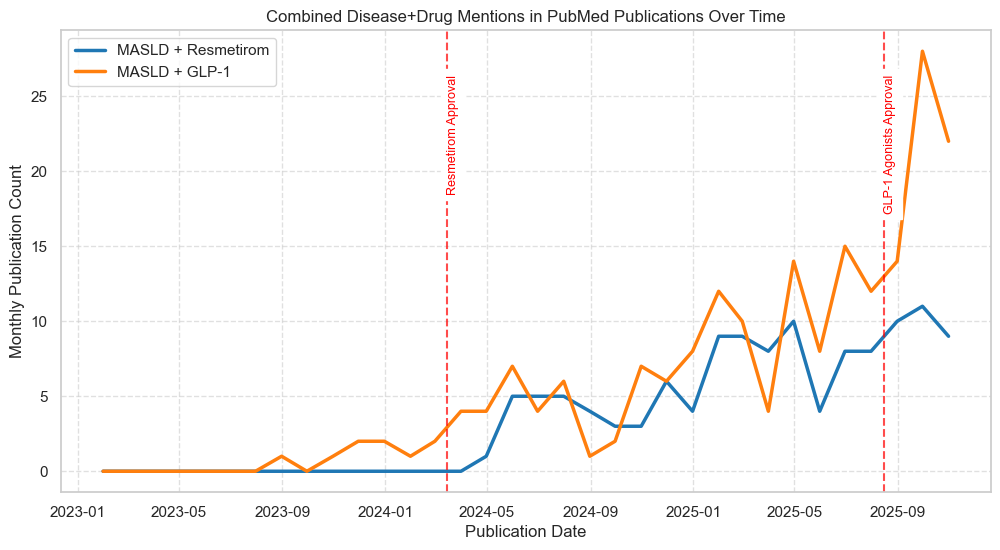

  > Displayed PubMed comparison plot in notebook
PubMed analysis completed


In [4]:
# PubMed Analysis
pubmed_data = get_pubmed_data()
if pubmed_data is not None:
    processed_pubmed = process_pubmed_data(pubmed_data)

    # Use ALL data for the analysis (not filtered)
    print(f"Analyzing {len(processed_pubmed)} total PubMed publications")

    # Add Data Preview:
    print(f"PubMed data shape: {processed_pubmed.shape}")
    print("First 3 rows of PubMed data:")
    print(processed_pubmed[['title', 'publication_date', 'journal']].head(3))
    print("="*50)

    # Process PubMed data using the publication rate analysis
    from analyze import analyze_pubmed_publication_rate
    analyze_pubmed_publication_rate(processed_pubmed, notebook_plot=True)
    print("PubMed analysis completed")


[Advanced Analysis] PubMed Advanced Analysis...

STATISTICAL SIGNIFICANCE TESTING
Resmetirom FDA Approval Impact:
  Before: 0 publications, After: 122 publications
  Effect: Created entirely new research area (no publications before approval)
  Significance: *** (clinically significant)

GLP-1 FDA Approval Impact:
  Before: 147 publications, After: 50 publications
  Odds Ratio: 3.545, p-value: 0.0000
  Significance: *
  > Saved timeline to: advanced_pubmed_timeline.png
  > Saved focus areas to: advanced_pubmed_focus_areas.png
  > Saved top journals to: advanced_pubmed_top_journals.png
  > Saved FDA impact to: advanced_pubmed_fda_impact.png

PUBMED ADVANCED ANALYSIS - SUMMARY TABLE
                         Metric              Value
             Total Publications                618
MASLD + Resmetirom Publications                122
     MASLD + GLP-1 Publications                197
        Resmetirom Pre-Approval                  0
       Resmetirom Post-Approval                122
   

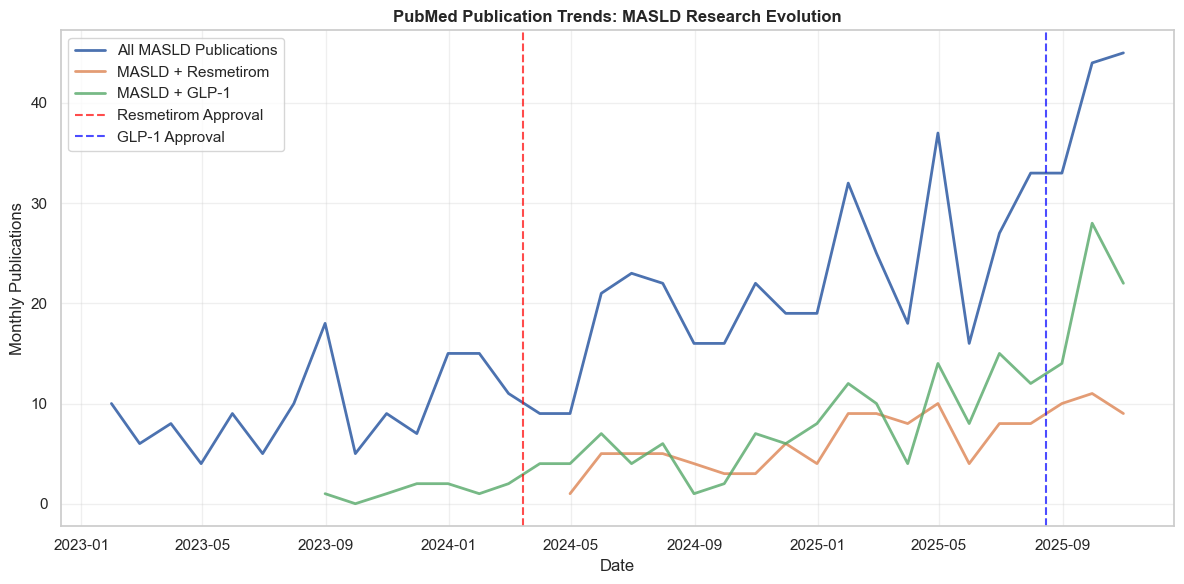

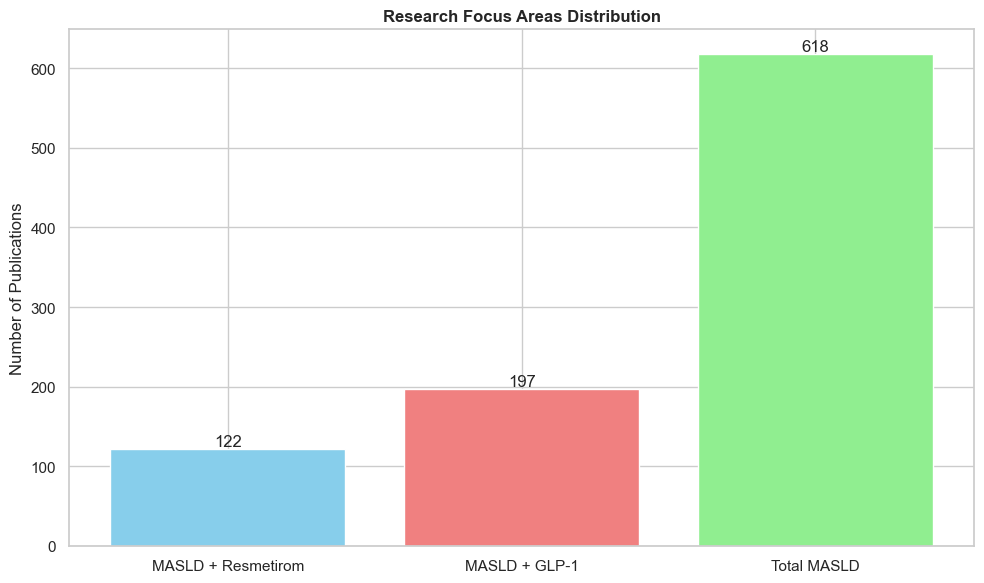

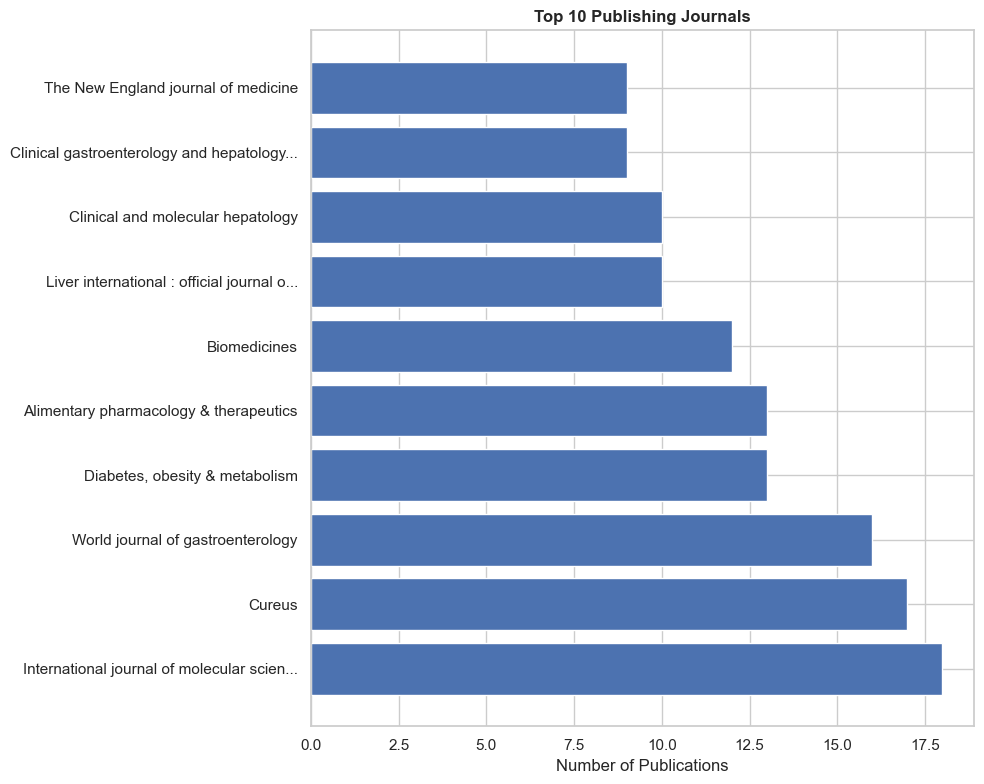

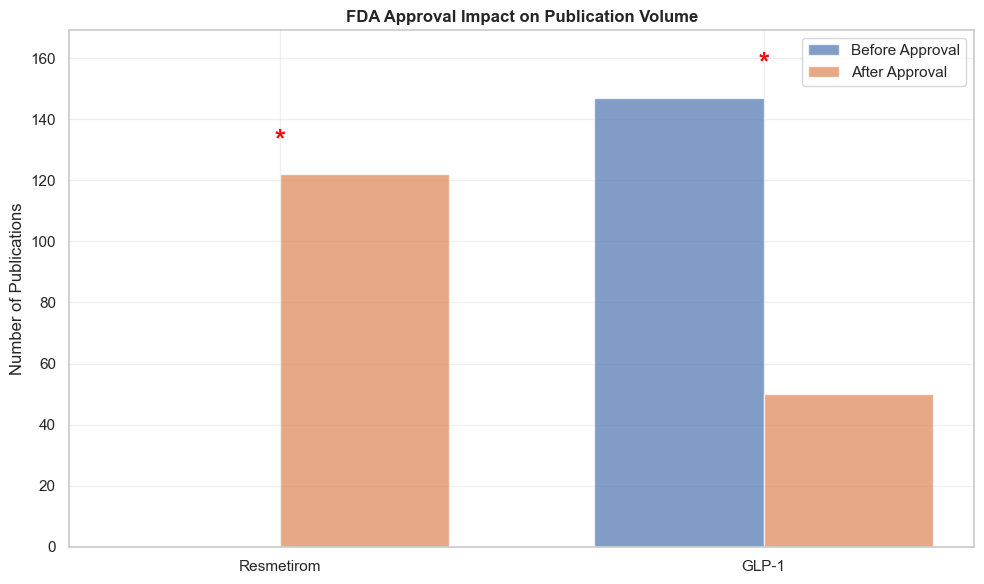

Total publications analyzed: 618


In [5]:
# Advanced PubMed analysis
pubmed_advanced_results = advanced_pubmed_analysis(processed_pubmed, notebook_plot=True)
print(f"Total publications analyzed: {pubmed_advanced_results['total_publications']}")

In [ ]:
# Stock Data Analysis
stock_data = get_stock_data()
if stock_data is not None:
    processed_stocks = process_stock_data(stock_data)

    # Add Data Preview:
    print(f"Stock data shape: {processed_stocks.shape}")
    print("First 3 rows of stock data:")
    print(processed_stocks.head(3))
    print("Stock price ranges:")
    print(f"NVO: ${processed_stocks['NVO_Close'].min():.2f} - ${processed_stocks['NVO_Close'].max():.2f}")
    print(f"MDGL: ${processed_stocks['MDGL_Close'].min():.2f} - ${processed_stocks['MDGL_Close'].max():.2f}")
    print("="*50)

    analyze_stock_and_events(processed_stocks, notebook_plot=True)
    print("Stock analysis completed")

In [ ]:
# Advanced Stock Analysis
from analyze import advanced_stock_analysis
stock_advanced_results = advanced_stock_analysis(processed_stocks, notebook_plot=True)

In [ ]:
# Advanced Stock Volatility Analysis
from analyze import advanced_stock_volatility_analysis
volatility_results = advanced_stock_volatility_analysis(processed_stocks, notebook_plot=True)

In [ ]:
from analyze import cross_platform_correlation_analysis

def fixed_cross_platform_correlation(processed_data: dict, notebook_plot=False):
    """Fixed version of cross-platform correlation analysis"""
    print("\n[Advanced Analysis] Cross-Platform Correlation Analysis...")

    save_dir = RESULTS_DIR / "stock_analysis"
    save_dir.mkdir(exist_ok=True, parents=True)

    # Extract data
    df_stocks = processed_data.get('stocks')
    df_trends = processed_data.get('trends')
    df_reddit = processed_data.get('reddit')

    if df_stocks is None:
        print("ERROR: Stock data not available")
        return None

    # Prepare stock returns
    df_stocks['NVO_Returns'] = df_stocks['NVO_Close'].pct_change() * 100
    df_stocks['MDGL_Returns'] = df_stocks['MDGL_Close'].pct_change() * 100
    stock_returns = df_stocks[['NVO_Returns', 'MDGL_Returns']].dropna()

    correlation_results = {}

    # CORRELATION WITH GOOGLE TRENDS
    if df_trends is not None:
        print("\n" + "="*50)
        print("STOCK RETURNS vs GOOGLE TRENDS CORRELATION")
        print("="*50)

        trends_daily = df_trends.resample('D').mean().ffill()

        start_date = max(stock_returns.index.min(), trends_daily.index.min())
        end_date = min(stock_returns.index.max(), trends_daily.index.max())

        stock_aligned = stock_returns.loc[start_date:end_date]
        trends_aligned = trends_daily.loc[start_date:end_date]

        print(f"Aligned period: {start_date.date()} to {end_date.date()} ({len(stock_aligned)} days)")

        trend_correlations = {}
        for trend_col in ['MASLD', 'NAFLD', 'Rezdiffra', 'Wegovy', 'Ozempic']:
            if trend_col in trends_aligned.columns:
                nvo_corr = stock_aligned['NVO_Returns'].corr(trends_aligned[trend_col])
                mdgl_corr = stock_aligned['MDGL_Returns'].corr(trends_aligned[trend_col])

                trend_correlations[trend_col] = {
                    'NVO_Correlation': nvo_corr,
                    'MDGL_Correlation': mdgl_corr
                }

                print(f"{trend_col}: NVO={nvo_corr:.3f}, MDGL={mdgl_corr:.3f}")

        correlation_results['google_trends'] = trend_correlations

        # Plot heatmap
        plt.figure(figsize=(10, 6))
        corr_data = []
        for trend, corrs in trend_correlations.items():
            corr_data.append([corrs['NVO_Correlation'], corrs['MDGL_Correlation']])

        corr_df = pd.DataFrame(corr_data,
                              index=trend_correlations.keys(),
                              columns=['NVO Returns', 'MDGL Returns'])

        sns.heatmap(corr_df, annot=True, cmap='RdBu_r', center=0,
                   vmin=-1, vmax=1, square=True)
        plt.title('Stock Returns vs Google Search Interest Correlation', fontweight='bold')
        plt.tight_layout()

        trends_corr_path = save_dir / "cross_platform_trends_correlation.png"
        plt.savefig(trends_corr_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Saved trends correlation to: {trends_corr_path.name}")

    # FIXED CORRELATION WITH REDDIT SENTIMENT
    if df_reddit is not None and 'sentiment_score' in df_reddit.columns:
        print("\n" + "="*50)
        print("STOCK RETURNS vs REDDIT SENTIMENT CORRELATION")
        print("="*50)

        # Prepare Reddit sentiment
        df_reddit['timestamp'] = pd.to_datetime(df_reddit['timestamp'])
        reddit_daily = df_reddit.set_index('timestamp')['sentiment_score'].resample('D').mean()

        # Align time periods with proper handling of missing dates
        start_date = max(stock_returns.index.min(), reddit_daily.index.min())
        end_date = min(stock_returns.index.max(), reddit_daily.index.max())

        stock_aligned = stock_returns.loc[start_date:end_date]
        reddit_aligned = reddit_daily.loc[start_date:end_date]

        # FIX: Ensure both series have the same dates by reindexing
        common_dates = stock_aligned.index.intersection(reddit_aligned.index)
        stock_final = stock_aligned.loc[common_dates]
        reddit_final = reddit_aligned.loc[common_dates]

        print(f"Aligned period: {start_date.date()} to {end_date.date()}")
        print(f"After alignment: {len(stock_final)} matching days")

        # Calculate correlations
        nvo_sentiment_corr = stock_final['NVO_Returns'].corr(reddit_final)
        mdgl_sentiment_corr = stock_final['MDGL_Returns'].corr(reddit_final)

        sentiment_correlations = {
            'NVO_Sentiment_Correlation': nvo_sentiment_corr,
            'MDGL_Sentiment_Correlation': mdgl_sentiment_corr
        }

        correlation_results['reddit_sentiment'] = sentiment_correlations

        print(f"Reddit Sentiment Correlation: NVO={nvo_sentiment_corr:.3f}, MDGL={mdgl_sentiment_corr:.3f}")

        # FIXED: Scatter plots with properly aligned data
        if len(stock_final) > 0 and len(reddit_final) > 0:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

            # NVO vs Sentiment
            ax1.scatter(reddit_final.values, stock_final['NVO_Returns'].values, alpha=0.6, s=30)
            ax1.set_xlabel('Reddit Sentiment Score')
            ax1.set_ylabel('NVO Daily Returns (%)')
            ax1.set_title(f'NVO Returns vs Reddit Sentiment\n(correlation: {nvo_sentiment_corr:.3f})')
            ax1.grid(True, alpha=0.3)

            # MDGL vs Sentiment
            ax2.scatter(reddit_final.values, stock_final['MDGL_Returns'].values, alpha=0.6, s=30, color='orange')
            ax2.set_xlabel('Reddit Sentiment Score')
            ax2.set_ylabel('MDGL Daily Returns (%)')
            ax2.set_title(f'MDGL Returns vs Reddit Sentiment\n(correlation: {mdgl_sentiment_corr:.3f})')
            ax2.grid(True, alpha=0.3)

            plt.tight_layout()

            sentiment_corr_path = save_dir / "cross_platform_sentiment_correlation.png"
            plt.savefig(sentiment_corr_path, dpi=300, bbox_inches='tight')
            plt.show()
            print(f"Saved sentiment correlation to: {sentiment_corr_path.name}")
        else:
            print("WARNING: No overlapping data for Reddit sentiment scatter plots")

    # CORRELATION BETWEEN STOCKS
    print("\n" + "="*50)
    print("INTER-STOCK CORRELATION ANALYSIS")
    print("="*50)

    stock_correlation = stock_returns['NVO_Returns'].corr(stock_returns['MDGL_Returns'])
    correlation_results['stock_correlation'] = stock_correlation

    print(f"NVO vs MDGL Returns Correlation: {stock_correlation:.3f}")

    # Stock correlation scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(stock_returns['NVO_Returns'], stock_returns['MDGL_Returns'],
                alpha=0.6, s=30, color='green')
    plt.xlabel('NVO Daily Returns (%)')
    plt.ylabel('MDGL Daily Returns (%)')
    plt.title(f'NVO vs MDGL Returns Correlation\n(correlation: {stock_correlation:.3f})')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()

    stock_corr_path = save_dir / "cross_platform_stock_correlation.png"
    plt.savefig(stock_corr_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved stock correlation to: {stock_corr_path.name}")

    # SUMMARY TABLE
    print("\n" + "="*60)
    print("CROSS-PLATFORM CORRELATION - SUMMARY TABLE")
    print("="*60)

    summary_data = []

    # Add Google Trends correlations
    if 'google_trends' in correlation_results:
        for trend, corrs in correlation_results['google_trends'].items():
            summary_data.append({
                'Platform': 'Google Trends',
                'Metric': trend,
                'NVO_Correlation': f"{corrs['NVO_Correlation']:.3f}",
                'MDGL_Correlation': f"{corrs['MDGL_Correlation']:.3f}"
            })

    # Add Reddit sentiment correlation
    if 'reddit_sentiment' in correlation_results:
        summary_data.append({
            'Platform': 'Reddit',
            'Metric': 'Sentiment Score',
            'NVO_Correlation': f"{correlation_results['reddit_sentiment']['NVO_Sentiment_Correlation']:.3f}",
            'MDGL_Correlation': f"{correlation_results['reddit_sentiment']['MDGL_Sentiment_Correlation']:.3f}"
        })

    # Add stock correlation
    summary_data.append({
        'Platform': 'Stocks',
        'Metric': 'NVO vs MDGL',
        'NVO_Correlation': f"{correlation_results['stock_correlation']:.3f}",
        'MDGL_Correlation': f"{correlation_results['stock_correlation']:.3f}"
    })

    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))

    # Save summary table
    summary_path = save_dir / "cross_platform_correlation_summary.csv"
    summary_df.to_csv(summary_path, index=False)
    print(f"Saved correlation summary to: {summary_path.name}")

    return correlation_results

# Run the fixed correlation analysis
correlation_results = fixed_cross_platform_correlation({
    'stocks': processed_stocks,
    'trends': processed_trends,
    'reddit': processed_reddit
}, notebook_plot=True)

print("Cross-platform correlation analysis completed!")

In [ ]:
# Media Cloud
MEDIA_CLOUD_ANALYSIS_SUBDIR = "media_cloud_analysis"

media_cloud_available = get_media_cloud_data()
if media_cloud_available:
    try:
        from analyze import analyze_media_cloud_timeline, analyze_media_cloud_sources

        # Add Data Preview:
        print("Media Cloud datasets loaded:")
        from analyze import load_media_cloud_datasets
        datasets = load_media_cloud_datasets()
        for name, data in datasets.items():
            if 'counts' in data:
                print(f"  {name}: {data['counts'].shape[0]} time points")
            if 'sources' in data:
                print(f"  {name}: {data['sources'].shape[0]} unique sources")
        print("="*50)

        print("Running Media Cloud timeline analysis...")
        timeline_results = analyze_media_cloud_timeline(notebook_plot=True)

        print("Media Cloud analysis completed!")

    except Exception as e:
        print(f"Error: {e}")

In [ ]:
print("\n=== MEDIA CLOUD FDA EVENT IMPACT ANALYSIS ===")
media_cloud_results = advanced_media_cloud_event_analysis(notebook_plot=True)

In [ ]:
print("\n=== MEDIA CLOUD COVERAGE CONCENTRATION ANALYSIS ===")
concentration_results = advanced_media_cloud_concentration_analysis(notebook_plot=True)

In [ ]:
print("\n=== MEDIA CLOUD TOPIC PROPAGATION ANALYSIS ===")
propagation_results = advanced_media_cloud_topic_propagation(notebook_plot=True)